# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 5: *CurveatureDetection*
Obtain curvature by computing angle differences
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, createImageF, plotImageL, plotImageF 
from ImageOperatorsUtilities import applyCannyEdgeDetector

# Math and iteration
from math import cos, sin
from timeit import itertools

### Parameters:
    imageName = Input image name
    GaussianKernelSize = Gaussian kernel size. Filter noise
    sobelKernelSize = Sobel kernel size. Edge detection
    upperT = Upper threshold
    lowerT = Lower threshold
    windowDelta = Size of the region used to find neighbors

In [2]:
imageName = "Shapes.png"
GaussianKernelSize = 7
sobelKernelSize = 3
upperT = 0.4
lowerT = 0.2
windowDelta = 2

### Read and show image

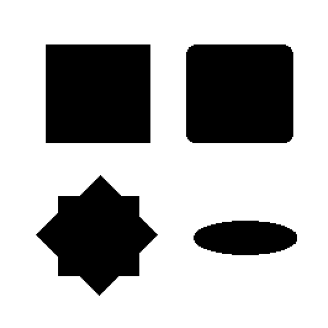

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter5/Input/")
inputImage, width, height = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Compute edges and show result

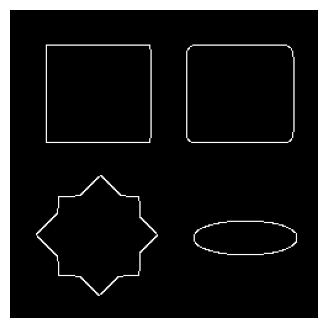

In [4]:
magnitude, angle = applyCannyEdgeDetector(inputImage, GaussianKernelSize, sobelKernelSize, upperT, lowerT)
plotImageF(magnitude, figureSize = 4)

### Compute curvature by subtracting the direction of neighbors

In [5]:
curvature = createImageF(width, height)
for x,y in itertools.product(range(0, width), range(0, height)):
    # Edge
    if magnitude[y,x] > 0:  
        # Consider neighbor edges
        edgesNeigbor = [ ]
        for wx,wy in itertools.product(range(-windowDelta, windowDelta+1),       \
                                       range(-windowDelta, windowDelta+1)):
            if magnitude[y+wy, x+wx] > 0 : 
                edgesNeigbor.append((y+wy,x+wx))
               
        # Use dot product to measure angle difference
        np = len(edgesNeigbor)     
        for p in range(0, np):
            y1 = (edgesNeigbor[p])[0]
            x1 = (edgesNeigbor[p])[1]
            curvature[y,x] += 1.0-(cos(angle[y1,x1]) * cos(angle[y,x])         \
                                 + sin(angle[y1,x1]) * sin(angle[y,x]))
        if np > 0:
            curvature[y,x] /= np 

### Show result

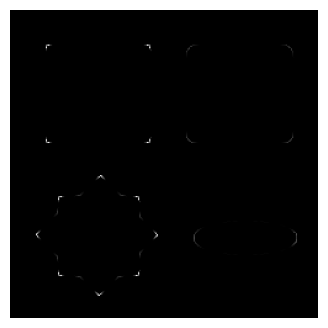

In [6]:
plotImageF(curvature, figureSize = 4)